In [2]:
# Импротируем необходимые функции
import numpy as np # работа с массивами и линейной алгеброй
import matplotlib.pyplot as plt # для отрисовки графиков
import pandas as pd # для чтения и работы с данными
from scipy.optimize import curve_fit # фитирующая процедура

In [13]:
def psi_f(x):
    return np.exp(-x**2/2)/np.sqrt(np.sqrt(np.pi))

def integrate_hist(hist, bin_edges):
    integral = 0
    for i in range(len(hist)):
        integral += hist[i]*(bin_edges[i+1] - bin_edges[i])
    return integral

def distr(df):
    pedestrians, bin_edges = np.histogram(df, bins = 1000)
    #print bin_edges
    
    width = bin_edges[1] - bin_edges[0]
    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], pedestrians, width = width)
    plt.xlabel('Ось x'.decode('utf-8'))
    plt.ylabel('Количество пешеходов (N)'.decode('utf-8'))
    plt.title('Распределение пешеходов по оси'.decode('utf-8'))
    plt.legend()
    plt.show()
    
    pedestrians_sq = pedestrians*pedestrians
    norm = integrate_hist(pedestrians_sq, bin_edges)
    psi_sq = pedestrians_sq/norm
    psi = pedestrians/np.sqrt(norm)

    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], psi, width = width)
    plt.xlabel('x'.decode('utf-8'))
    plt.ylabel('$\psi(x)$'.decode('utf-8'))
    plt.title(''.decode('utf-8'))
    ###
    x = np.arange(-4, 4, 0.1)
    plt.plot(x, psi_f(x), color = 'black', label = '$\psi(x)$, теоретическая'.decode('utf-8'))
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], psi_sq, width = width)
    plt.xlabel('x'.decode('utf-8'))
    plt.ylabel('$\psi^2(x)$'.decode('utf-8'))
    plt.title('Плотность вероятности'.decode('utf-8'))
    plt.plot(x, psi_f(x)**2, color = 'black', label = '$\psi^2(x)$, теоретическая'.decode('utf-8'))
    plt.legend()
    plt.show()

In [14]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.1_srange=10/output.csv')
frame.head()

,x
0,-1.244409
1,-0.316467
2,-0.707751
3,0.315552
4,-0.428564


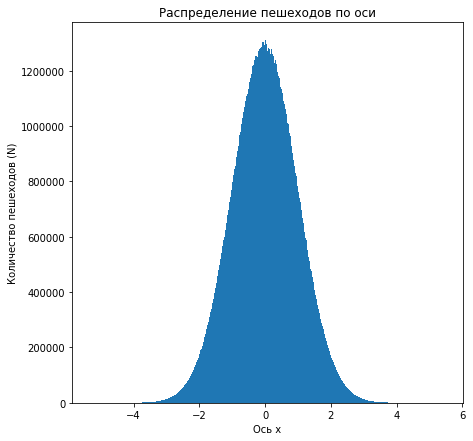

KeyboardInterrupt: 

In [15]:
distr(frame)

In [8]:
def drawNE(df):
    plt.figure(figsize=(20,7))
    plt.scatter(np.arange(df.shape[0]), df['N'], linewidths=0.1, label = 'Количество пешеходов'.decode('utf-8') )
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('Количество пешеходов (N)'.decode('utf-8'))
    plt.title('Зависимость N от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.plot(np.arange(df.shape[0]), df['E'], label = 'Данные'.decode('utf-8'))
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('E'.decode('utf-8'))
    plt.title('Зависимость энергии от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.ylim(0.4, 0.6)
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.plot(np.arange(df.shape[0]), df['E_r'], label = 'Данные'.decode('utf-8'))
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('E_r'.decode('utf-8'))
    plt.title('Зависимость опорного потенциала от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.ylim(0.4, 0.6)
    plt.show()

In [4]:
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.1_srange=10/outputNE.csv')

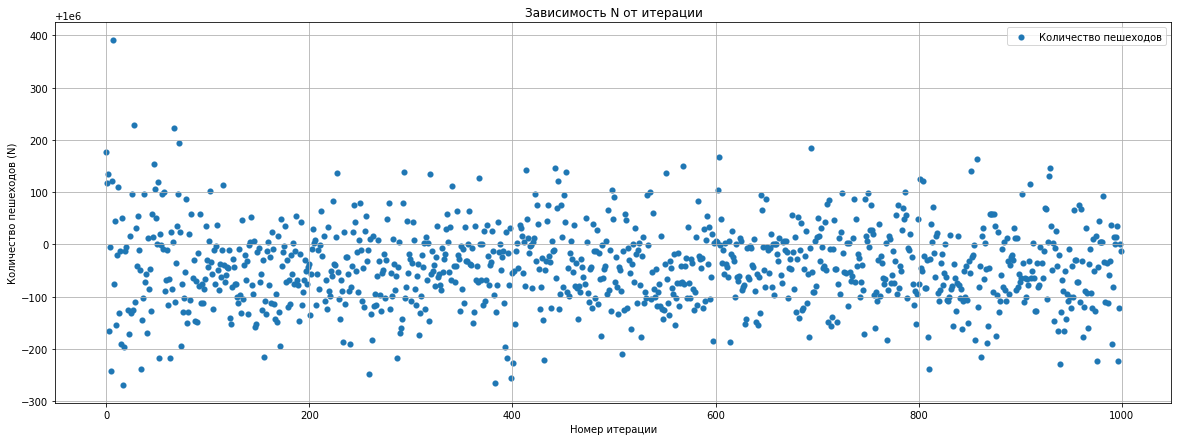

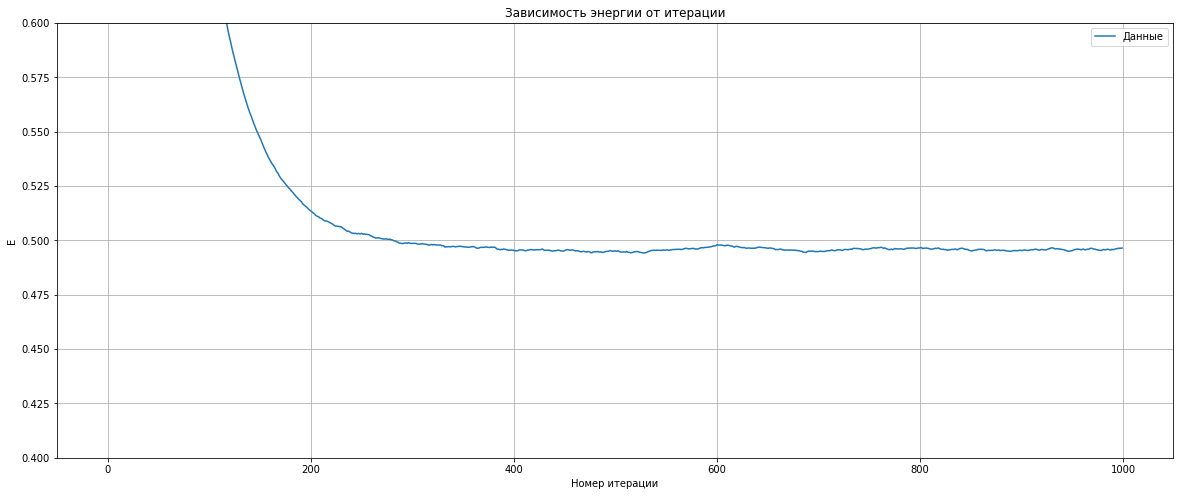

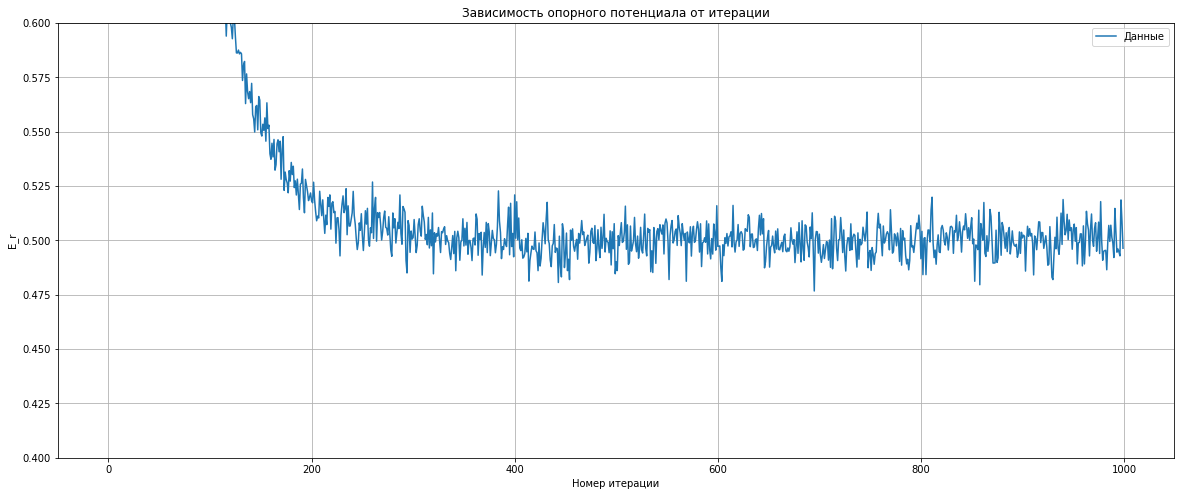

In [9]:
drawNE(frameNE)

In [10]:
print frameNE[500:]['E'].mean()
print frameNE[500:]['E_r'].mean()

0.495856632
0.500038734


In [11]:
del frame
del frameNE

NameError: name 'frame' is not defined